Importing data

In [2]:
import pandas as pd
df = pd.read_csv('creditcard.csv')

In [3]:
print("Shape of dataset:", df.shape)
print("/nFirst 5 rows:")
df.head()

Shape of dataset: (160580, 31)
/nFirst 5 rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


Preprocess and normalize the transaction data

In [4]:
print("Class Distribution (0=Genuine, 1=Fraud):")
print(df['Class'].value_counts())

Class Distribution (0=Genuine, 1=Fraud):
Class
0.0    160223
1.0       356
Name: count, dtype: int64


In [5]:
from sklearn.preprocessing import StandardScaler
data = df.copy()
scaler = StandardScaler()
data[["Time","Amount"]] = scaler.fit_transform(data[["Time","Amount"]])

print("After Scaling:")
print(data[["Time","Amount"]].head())


After Scaling:
       Time    Amount
0 -2.331994  0.254027
1 -2.331994 -0.345299
2 -2.331954  1.188279
3 -2.331954  0.147484
4 -2.331913 -0.070783


Split into training and testing sets

In [13]:
from sklearn.model_selection import train_test_split
data = data.dropna(subset=['Class'])

X = data.drop('Class', axis=1)
y = data['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training size:", X_train.shape)
print("Test size:", X_test.shape)
print("Fraud cases in training set:", sum(y_train))
print("Fraud cases in test set:", sum(y_test))



Training size: (128463, 30)
Test size: (32116, 30)
Fraud cases in training set: 285.0
Fraud cases in test set: 71.0


Train classification algorithm

In [14]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")


Logistic Regression model trained successfully.


In [15]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred, digits=4))
print("\nROC-AUC Score:\n", roc_auc_score(y_test, y_proba))

Confusion Matrix:
 [[31281   764]
 [    6    65]]

Classification Report:
               precision    recall  f1-score   support

         0.0     0.9998    0.9762    0.9878     32045
         1.0     0.0784    0.9155    0.1444        71

    accuracy                         0.9760     32116
   macro avg     0.5391    0.9458    0.5661     32116
weighted avg     0.9978    0.9760    0.9860     32116


ROC-AUC Score:
 0.9653842857425406


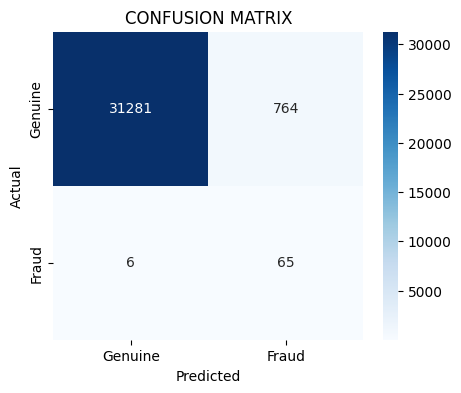

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Genuine","Fraud"], yticklabels=["Genuine", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CONFUSION MATRIX")
plt.show()


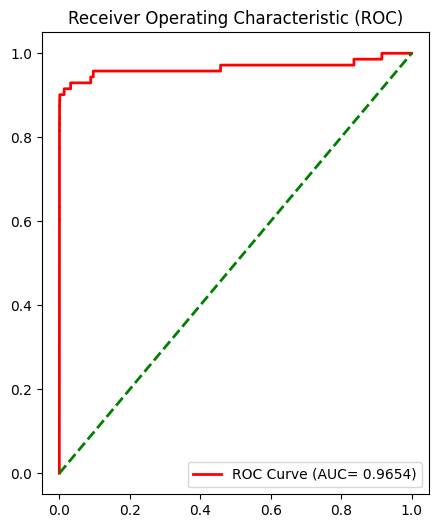

In [17]:
#roc curve
fpr, tpr, thresholds = roc_curve(y_test,y_proba)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(5,6))
plt.plot(fpr, tpr, color="red", lw=2, label="ROC Curve (AUC= %0.4f)" %roc_auc)
plt.plot([0,1],[0,1], color="green", lw=2, linestyle="--")
plt.xlabel=("False Positive Rate")
plt.ylabel=("True Positive Rate(Recall)")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, digits=4))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))

Confusion Matrix:
 [[32044     1]
 [   12    59]]

Classification Report:
               precision    recall  f1-score   support

         0.0     0.9996    1.0000    0.9998     32045
         1.0     0.9833    0.8310    0.9008        71

    accuracy                         0.9996     32116
   macro avg     0.9915    0.9155    0.9503     32116
weighted avg     0.9996    0.9996    0.9996     32116

ROC-AUC Score: 0.9494348836033836


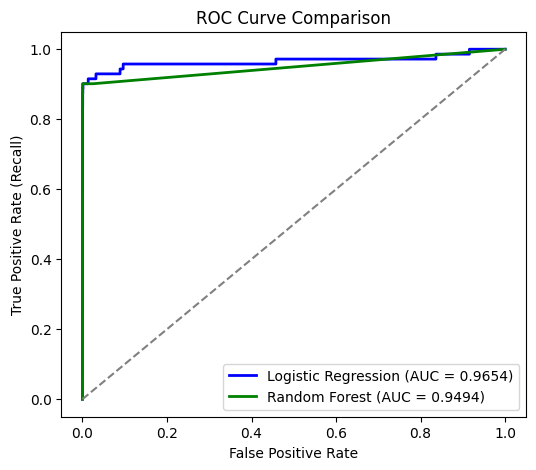

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ROC curve data
fpr1, tpr1, _ = roc_curve(y_test, y_proba)
fpr2, tpr2, _ = roc_curve(y_test, y_proba_rf)   # Random Forest

# Plot ROC curves
plt.figure(figsize=(6,5))
plt.plot(fpr1, tpr1, color="blue", lw=2, label="Logistic Regression (AUC = %0.4f)" % auc(fpr1, tpr1))
plt.plot(fpr2, tpr2, color="green", lw=2, label="Random Forest (AUC = %0.4f)" % auc(fpr2, tpr2))
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # baseline
plt.xlabel = plt.gca().set_xlabel("False Positive Rate")
plt.ylabel = plt.gca().set_ylabel("True Positive Rate (Recall)")
plt.title = plt.gca().set_title ("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest with class weights
rf = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, digits=4))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))


Confusion Matrix:
 [[56861     3]
 [   25    73]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9605    0.7449    0.8391        98

    accuracy                         0.9995     56962
   macro avg     0.9800    0.8724    0.9194     56962
weighted avg     0.9995    0.9995    0.9995     56962

ROC-AUC Score: 0.952908497036969


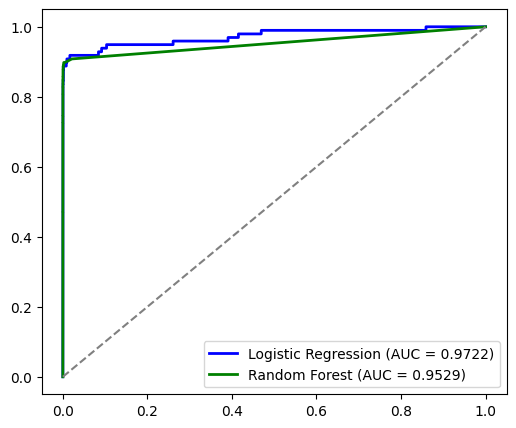

In [32]:
#roc vs random forest
fpr1, tpr1, _ = roc_curve(y_test, y_proba)
fpr2, tpr2, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr1, tpr1, color="blue", lw=2, label="Logistic Regression (AUC = %0.4f)" % auc(fpr1, tpr1))
plt.plot(fpr2, tpr2, color="green", lw=2, label="Random Forest (AUC = %0.4f)" % auc(fpr2, tpr2))
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()


In [33]:
import numpy as np

def predict_transaction(model, transaction):
    """
    transaction: list or numpy array of length 30 (features without 'Class')
    model: trained model (e.g., rf or log_reg)
    """
    transaction = np.array(transaction).reshape(1, -1)  # reshape for model
    prediction = model.predict(transaction)[0]
    probability = model.predict_proba(transaction)[0][1]  # probability of fraud
    return prediction, probability

# Example: take first row from test set
sample = X_test.iloc[0].values
pred, prob = predict_transaction(rf, sample)

print("Prediction:", "Fraud" if pred==1 else "Genuine")
print("Fraud Probability:", prob)


Prediction: Genuine
Fraud Probability: 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Evaluate the model using precision, recall, F1-score

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Logistic Regression Evaluation
print("Logistic Regression Results")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# Random Forest Evaluation
print("\nRandom Forest Results")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

Logistic Regression Results
[[31281   764]
 [    6    65]]
              precision    recall  f1-score   support

         0.0     0.9998    0.9762    0.9878     32045
         1.0     0.0784    0.9155    0.1444        71

    accuracy                         0.9760     32116
   macro avg     0.5391    0.9458    0.5661     32116
weighted avg     0.9978    0.9760    0.9860     32116

ROC-AUC: 0.9653842857425406

Random Forest Results
[[32044     1]
 [   12    59]]
              precision    recall  f1-score   support

         0.0     0.9996    1.0000    0.9998     32045
         1.0     0.9833    0.8310    0.9008        71

    accuracy                         0.9996     32116
   macro avg     0.9915    0.9155    0.9503     32116
weighted avg     0.9996    0.9996    0.9996     32116

ROC-AUC: 0.9494348836033836


Consider oversampling or undersampling for improving results

In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print("Before:", y_train.value_counts())
print("After:", y_res.value_counts())


Before: Class
0.0    128178
1.0       285
Name: count, dtype: int64
After: Class
0.0    128178
1.0    128178
Name: count, dtype: int64


In [28]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print("After undersampling:", y_res.value_counts())


After undersampling: Class
0.0    285
1.0    285
Name: count, dtype: int64


In [29]:
rf_resampled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_resampled.fit(X_res, y_res)

y_pred_res = rf_resampled.predict(X_test)
print(classification_report(y_test, y_pred_res, digits=4))


              precision    recall  f1-score   support

         0.0     0.9998    0.9820    0.9908     32045
         1.0     0.1011    0.9155    0.1821        71

    accuracy                         0.9818     32116
   macro avg     0.5504    0.9487    0.5864     32116
weighted avg     0.9978    0.9818    0.9890     32116

